In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Build a predictive model to predict flower species if we know "SepalLengthCm", 	"SepalWidthCm",  	"PetalLengthCm" , 	"PetalWidthCm".**

In [ ]:
X = df.drop(columns = ['Id','Species'])
y = df['Species']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.75)

**Decision Tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

modelA = DecisionTreeClassifier()

#modelA = DecisionTreeClassifier(min_samples_leaf=15)

#modelA = DecisionTreeClassifier(max_depth=2)

#modelA = DecisionTreeClassifier(max_leaf_nodes=4)

modelA.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
print(modelA.score(xtrain,ytrain))

1.0


In [ ]:
print(modelA.score(xtest,ytest))

0.9210526315789473


**Decision tree classifier without tuning or using limiting criteria - it will lead you to overfit model**

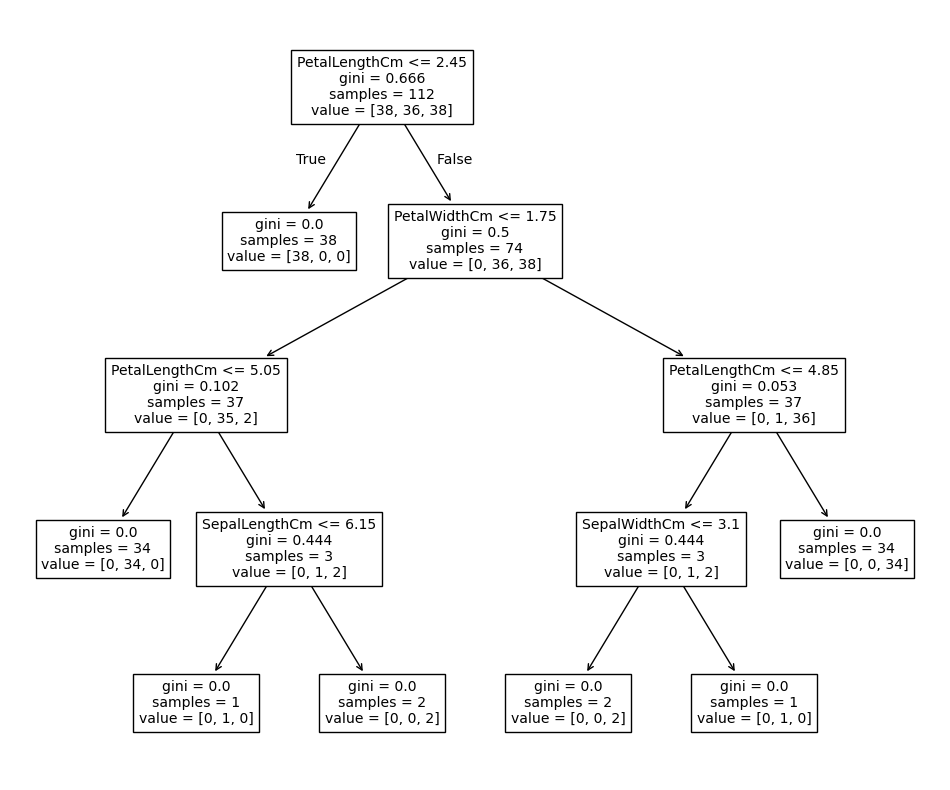

In [ ]:
plt.figure(figsize = (12,10))

plot_tree(modelA, feature_names=xtrain.columns)

plt.show()

**Grid Search CV**

  * Tunining Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

param_gid = {
    'min_samples_leaf' : [5,7,9,11,13,15],
    'max_leaf_nodes' : [4,5,6,7,8],
    'max_depth' : [2,3,4,5]
}

modelB = DecisionTreeClassifier()

gridModel = GridSearchCV(modelB , param_gid)

In [ ]:
gridModel.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 7, 9, 11, 13, 15]})

In [ ]:
print(gridModel.best_params_)

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 5}


In [ ]:
modelC = DecisionTreeClassifier(max_depth= 2, max_leaf_nodes= 4, min_samples_leaf= 5)
modelC.fit(xtrain,ytrain)

print(modelC.score(xtrain,ytrain))
print(modelC.score(xtest,ytest))

0.9732142857142857
0.9210526315789473


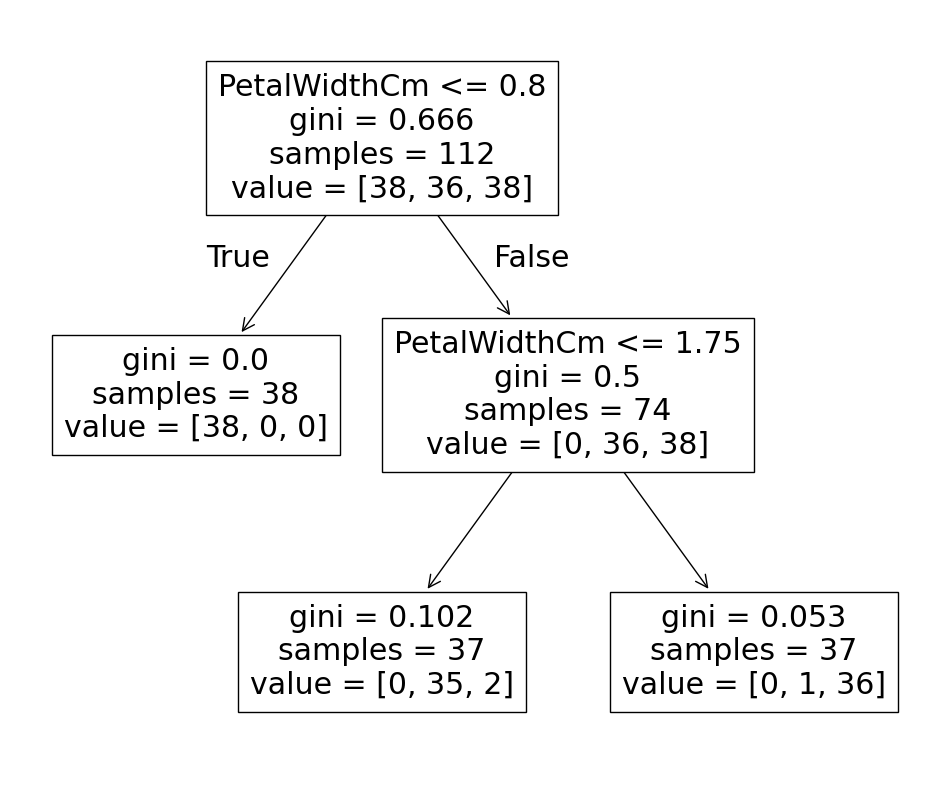

In [ ]:
plt.figure(figsize = (12,10))

plot_tree(modelC, feature_names=xtrain.columns)

plt.show()

****
****
**Wine class classification**
****

In [ ]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/wine.csv')
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
df_wine['Target'].unique()

array([0, 1, 2])

In [ ]:
#Build a decision tree model to predict wine class
#Find out train & test data accuracy

Xw = df_wine.drop(columns = ['Target'])
yw = df_wine['Target']

In [ ]:
xtrainW, xtestW, ytrainW, ytestW = train_test_split(Xw,yw)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_gid = {
    'min_samples_leaf' : [5,7,9,11,13,15],
    'max_leaf_nodes' : [4,5,6,7,8],
    'max_depth' : [2,3,4,5]
}

model_wine = DecisionTreeClassifier()

gridModel_Wine = GridSearchCV(model_wine, param_gid)

In [ ]:
gridModel_Wine.fit(xtrainW, ytrainW)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 7, 9, 11, 13, 15]})

In [ ]:
gridModel_Wine.best_params_

{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 5}

In [ ]:
model_wine_2 = DecisionTreeClassifier(max_depth = 4,
                                      max_leaf_nodes = 5,
                                      min_samples_leaf = 5)
model_wine_2.fit(xtrainW, ytrainW)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=5)

In [ ]:
print(model_wine_2.score(xtrainW,ytrainW))

0.9473684210526315


In [ ]:
print(model_wine_2.score(xtestW,ytestW))

0.8222222222222222


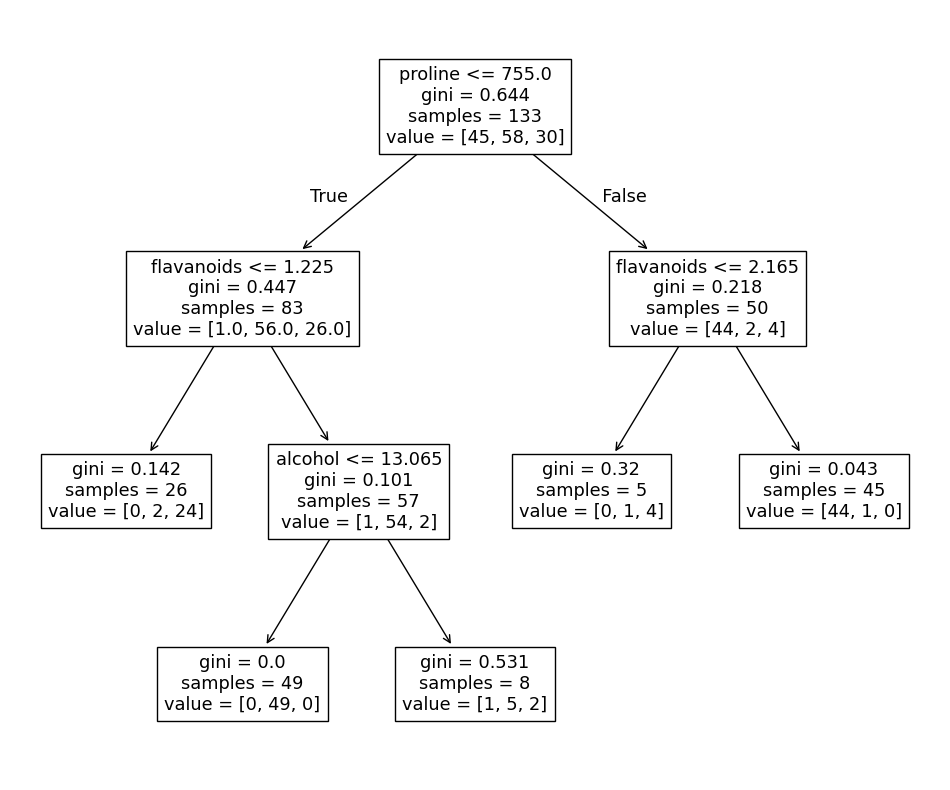

In [ ]:
plt.figure(figsize = (12,10))

plot_tree(model_wine_2, feature_names=xtrainW.columns)

plt.show()